## Observations and Insights

## Dependencies and starter code

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata)
study_results_df = pd.read_csv(study_results)

# Combine the data into a single dataset
combined_data_df = pd.merge(mouse_metadata_df, study_results_df, how="outer", on="Mouse ID")
combined_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [19]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
                      

regimen_avg = combined_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
regimen_median = combined_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
regimen_var = combined_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
regimen_std = combined_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
regimen_sem = combined_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()


regimen_df = pd.DataFrame({"Mean": regimen_avg, "Median": regimen_median, 
                           "Variance": regimen_var, "Std Dev": regimen_std, "SEM": regimen_sem})
regimen_df




,Mean,Median,Variance,Std Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

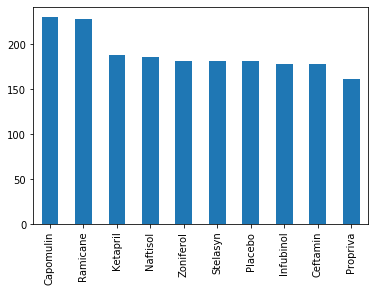

In [31]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
#regimen_ct = combined_data_df[["Drug Regimen"]].count()
#regimen_ct

regimen_treat = combined_data_df[["Drug Regimen"]]

data_pts_regimen = regimen_treat["Drug Regimen"].value_counts()
#data_pts_regimen

pand_bplot = data_pts_regimen.plot.bar(x="Drug Treatment", y="Count",rot=90)
pand_bplot

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot



## Pie plots

In [5]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

## Quartiles, outliers and boxplots

In [7]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

In [8]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and scatter plots

In [9]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

In [10]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

In [11]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen